This notebook Analyzes the distribution of the sentiments and maps the sentiments "Ambiguous" and "Neutral" to Positive/Negative. Mantaining the true neutral ones.

After that :

- Tests every Vetorization technique with plenty of different models.

- Aplies smote to see if there is any good change.

- Grid search for hyperparameter tuning.




In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.sparse import load_npz


# Load your features and labels
features_dir = 'features'
X_tfidf = load_npz(os.path.join(features_dir, 'tfidf_features.npz'))
X_bow = load_npz(os.path.join(features_dir, 'bow_features.npz'))  # Add this line for Bag of Words
X_embeddings = np.load(os.path.join(features_dir, 'embedding_features.npy'))  
X_tfidf_embeddings = np.load(os.path.join(features_dir, 'tfidf_embedding_features.npy'))
labels_df = pd.read_csv(os.path.join(features_dir, 'emotionverse_labels.csv'))
lexicon = np.load(os.path.join(features_dir, 'lexicon_features.npy'))
embeddings100 = np.load(os.path.join(features_dir, 'embedding_features(100dims).npy'))
embeddings300 = np.load(os.path.join(features_dir, 'embedding_features(300dims).npy'))



In [40]:
print(labels_df["sentiment"].value_counts())


sentiment
Mixed        652
Positive     542
Negative     419
Ambiguous    158
Neutral      103
Name: count, dtype: int64


In [41]:

# Count occurrences of each primary_emotion in Positive & Negative
positive_negative_counts = labels_df[labels_df["sentiment"].isin(["Positive", "Negative"])] \
    .groupby(["sentiment", "primary_emotion"]).size().unstack(fill_value=0)

# Define a function to transform sentiment
def transform_sentiment(row):
    if row["sentiment"] in ["Ambiguous", "Neutral"]:
        emotion = row["primary_emotion"]
        pos_count = positive_negative_counts.loc["Positive", emotion] if emotion in positive_negative_counts.columns else 0
        neg_count = positive_negative_counts.loc["Negative", emotion] if emotion in positive_negative_counts.columns else 0
        
        # Assign to the more frequent sentiment
        if pos_count > neg_count:
            return "Positive"
        elif neg_count > pos_count:
            return "Negative"
        else:
            return "Neutral"  # If no clear mapping, keep it as Neutral
    return row["sentiment"]

# Apply transformation
labels_df["sentiment"] = labels_df.apply(transform_sentiment, axis=1)

# Save transformed dataset
labels_df.to_csv("transformed_emotionverse_labels.csv", index=False)

# Display class distribution after transformation

print(labels_df["sentiment"].value_counts())



sentiment
Mixed       652
Positive    596
Negative    537
Neutral      89
Name: count, dtype: int64


In [42]:
# Print Shape
print(f"Lexicon Feature Shape: {lexicon.shape}")  # Should match number of samples
print(f"Embeddings (100D) Shape: {embeddings100.shape}")  # Should be (num_samples, 100)

# Check First Few Rows (Sanity Check)
print("\nFirst 5 rows of Lexicon Features:\n", lexicon[:5])
print("\nFirst 5 rows of 100D Embeddings:\n", embeddings100[:5])

Lexicon Feature Shape: (1874, 4)
Embeddings (100D) Shape: (1874, 100)

First 5 rows of Lexicon Features:
 [[0.073  0.753  0.174  0.34  ]
 [0.108  0.618  0.274  0.5696]
 [0.063  0.551  0.386  0.8481]
 [0.166  0.521  0.313  0.3682]
 [0.095  0.694  0.211  0.3612]]

First 5 rows of 100D Embeddings:
 [[ 2.39822827e-02  3.62269193e-01  1.59319282e-01 -2.51242910e-02
  -4.33917612e-01  1.59005567e-01 -1.30264550e-01  4.40139847e-04
  -1.91363364e-01 -8.07872862e-02  4.06433672e-01 -6.17949329e-02
   3.97972837e-02 -1.92910265e-02 -1.58041254e-01 -3.83453578e-01
   2.93130688e-02  3.64883959e-01 -5.29326200e-01  3.67385000e-01
   2.38625869e-01  2.87111759e-01 -6.39415458e-02 -8.90702456e-02
   2.98434287e-01  2.79362857e-01 -1.02507152e-01 -4.38485295e-01
   4.74458158e-01 -2.11546913e-01 -1.06620923e-01  5.31994939e-01
   1.86300069e-01 -1.92499962e-02  1.12743326e-01  2.68694293e-02
  -1.81593135e-01  4.27941561e-01  2.04415798e-01 -7.67410845e-02
  -1.53240338e-01 -1.02355003e-01  1.859244


----- Sentiment Classification Results (TF-IDF) -----

Training Naive Bayes...
              precision    recall  f1-score   support

       Mixed       0.63      0.70      0.66       131
    Negative       0.62      0.79      0.70       107
     Neutral       1.00      0.11      0.20        18
    Positive       0.86      0.66      0.74       119

    accuracy                           0.69       375
   macro avg       0.78      0.57      0.58       375
weighted avg       0.72      0.69      0.68       375


Training Logistic Regression...
              precision    recall  f1-score   support

       Mixed       0.71      0.70      0.70       131
    Negative       0.70      0.85      0.77       107
     Neutral       1.00      0.33      0.50        18
    Positive       0.84      0.77      0.81       119

    accuracy                           0.75       375
   macro avg       0.81      0.66      0.69       375
weighted avg       0.76      0.75      0.75       375


Training Linear 

/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaco

              precision    recall  f1-score   support

       Mixed       0.55      0.61      0.58       131
    Negative       0.67      0.74      0.70       107
     Neutral       0.00      0.00      0.00        18
    Positive       0.68      0.64      0.66       119

    accuracy                           0.63       375
   macro avg       0.48      0.50      0.49       375
weighted avg       0.60      0.63      0.61       375


Training Linear SVM...
              precision    recall  f1-score   support

       Mixed       0.51      0.42      0.46       131
    Negative       0.57      0.81      0.67       107
     Neutral       0.00      0.00      0.00        18
    Positive       0.61      0.59      0.60       119

    accuracy                           0.57       375
   macro avg       0.43      0.46      0.43       375
weighted avg       0.54      0.57      0.54       375


----- Sentiment Classification Results (TF-IDF Weighted Embeddings) -----

Training Logistic Regression..

/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaco

              precision    recall  f1-score   support

       Mixed       0.50      0.55      0.52       131
    Negative       0.56      0.51      0.53       107
     Neutral       0.00      0.00      0.00        18
    Positive       0.64      0.68      0.66       119

    accuracy                           0.55       375
   macro avg       0.42      0.44      0.43       375
weighted avg       0.54      0.55      0.54       375


Training Linear SVM...
              precision    recall  f1-score   support

       Mixed       0.52      0.48      0.50       131
    Negative       0.51      0.50      0.51       107
     Neutral       0.00      0.00      0.00        18
    Positive       0.62      0.77      0.69       119

    accuracy                           0.56       375
   macro avg       0.41      0.44      0.42       375
weighted avg       0.52      0.56      0.54       375


----- Sentiment Classification Results (100D Embeddings) -----

Training Logistic Regression...
         

/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaco

              precision    recall  f1-score   support

       Mixed       0.63      0.63      0.63       131
    Negative       0.65      0.77      0.70       107
     Neutral       1.00      0.06      0.11        18
    Positive       0.68      0.66      0.67       119

    accuracy                           0.65       375
   macro avg       0.74      0.53      0.53       375
weighted avg       0.67      0.65      0.64       375


Training Linear SVM...
              precision    recall  f1-score   support

       Mixed       0.62      0.50      0.55       131
    Negative       0.62      0.82      0.71       107
     Neutral       0.80      0.44      0.57        18
    Positive       0.71      0.71      0.71       119

    accuracy                           0.66       375
   macro avg       0.69      0.62      0.64       375
weighted avg       0.66      0.66      0.65       375


----- Sentiment Classification Results (100D Embeddings) -----

Training Logistic Regression...
         

<Figure size 1200x800 with 0 Axes>

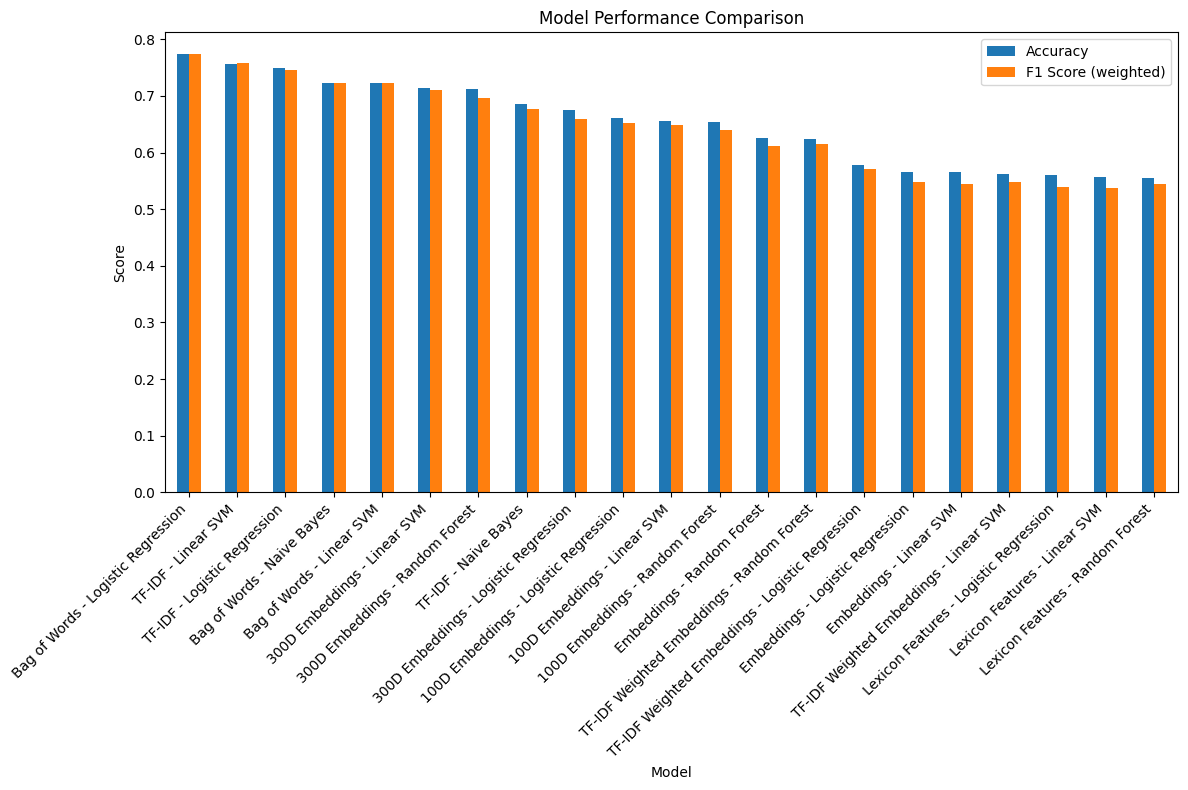


Best performing model: Bag of Words - Logistic Regression
Accuracy: 0.7733
F1 Score: 0.7737


In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

y_sentiment = labels_df['sentiment']

# 🚀 Split Data for Each Feature Type
X_tfidf_train, X_tfidf_test, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_bow_train, X_bow_test, y_train_bow, y_test_bow = train_test_split(
    X_bow, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_emb_train, X_emb_test, y_train_emb, y_test_emb = train_test_split(
    X_embeddings, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_tfidf_emb_train, X_tfidf_emb_test, y_train_tfidf_emb, y_test_tfidf_emb = train_test_split(
    X_tfidf_embeddings, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_lexicon_train, X_lexicon_test, y_train_lexicon, y_test_lexicon = train_test_split(
    lexicon, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_emb100_train, X_emb100_test, y_train_emb100, y_test_emb100 = train_test_split(
    embeddings100, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_emb300_train, X_emb300_test, y_train_emb300, y_test_emb300 = train_test_split(
    embeddings300, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)


# 🚀 Define Models
sparse_models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0),
    'Linear SVM': LinearSVC(C=1.0, max_iter=10000)
}

dense_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Linear SVM': LinearSVC(C=1.0, max_iter=10000)
}

# 🚀 Function to Evaluate Models and Display Results
def evaluate_models(X_train, X_test, y_train, y_test, models, feature_name):
    results = {}
    print(f"\n----- Sentiment Classification Results ({feature_name}) -----")
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Store model performance
        report = classification_report(y_test, y_pred, output_dict=True)
        results[name] = {
            'accuracy': report['accuracy'],
            'weighted_f1': report['weighted avg']['f1-score'],
            'model': model
        }
        
        # Print classification report
        print(classification_report(y_test, y_pred))
    
    return results

# 🚀 Evaluate All Feature Types
tfidf_results = evaluate_models(X_tfidf_train, X_tfidf_test, y_train_tfidf, y_test_tfidf, sparse_models, "TF-IDF")
bow_results = evaluate_models(X_bow_train, X_bow_test, y_train_bow, y_test_bow, sparse_models, "Bag of Words")
emb_results = evaluate_models(X_emb_train, X_emb_test, y_train_emb, y_test_emb, dense_models, "Embeddings")
tfidf_emb_results = evaluate_models(X_tfidf_emb_train, X_tfidf_emb_test, y_train_tfidf_emb, y_test_tfidf_emb, dense_models, "TF-IDF Weighted Embeddings")
lexicon_results = evaluate_models(X_lexicon_train, X_lexicon_test, y_train_lexicon, y_test_lexicon, dense_models, "Lexicon Features")
embedding100_results = evaluate_models(X_emb100_train, X_emb100_test, y_train_emb100, y_test_emb100, dense_models, "100D Embeddings")
embedding300_results = evaluate_models(X_emb300_train, X_emb300_test, y_train_emb300, y_test_emb300, dense_models, "100D Embeddings")

# 🚀 Combine All Results for Comparison
all_results = {}
for feature_name, results in zip(
    ["TF-IDF", "Bag of Words", "Embeddings", "TF-IDF Weighted Embeddings", "Lexicon Features", "100D Embeddings","300D Embeddings"],
    [tfidf_results, bow_results, emb_results, tfidf_emb_results, lexicon_results, embedding100_results,embedding300_results]
):
    for model_name, metrics in results.items():
        key = f"{feature_name} - {model_name}"
        all_results[key] = metrics

# 🚀 Create Comparison Table
comparison_df = pd.DataFrame({
    'Model': [k for k in all_results.keys()],
    'Accuracy': [v['accuracy'] for v in all_results.values()],
    'F1 Score (weighted)': [v['weighted_f1'] for v in all_results.values()]
})

# 🚀 Sort by Accuracy
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

# 🚀 Display and Save Comparison Results
print("\n----- Overall Model Comparison -----")
print(comparison_df)
comparison_df.to_csv('sentiment_model_comparison.csv', index=False)

# 🚀 Plot Comparison Bar Chart
plt.figure(figsize=(12, 8))
comparison_df.plot(x='Model', y=['Accuracy', 'F1 Score (weighted)'], kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('sentiment_model_comparison.png')
plt.show()

# 🚀 Find the Best Model
best_model_row = comparison_df.iloc[0]
best_model_name = best_model_row['Model']
print(f"\nBest performing model: {best_model_name}")
print(f"Accuracy: {best_model_row['Accuracy']:.4f}")
print(f"F1 Score: {best_model_row['F1 Score (weighted)']:.4f}")


# CLAUDE ......................

TF-IDF shape: (1874, 3081)
300D Embeddings shape: (1874, 300)
Lexicon shape: (1874, 4)

----- Sentiment Classification Results (TF-IDF + 300D Embeddings) -----

Training Logistic Regression...
              precision    recall  f1-score   support

       Mixed       0.73      0.69      0.71       131
    Negative       0.70      0.87      0.78       107
     Neutral       1.00      0.39      0.56        18
    Positive       0.84      0.80      0.82       119

    accuracy                           0.76       375
   macro avg       0.82      0.69      0.72       375
weighted avg       0.77      0.76      0.76       375


Training Linear SVM...
              precision    recall  f1-score   support

       Mixed       0.74      0.68      0.71       131
    Negative       0.72      0.84      0.78       107
     Neutral       1.00      0.72      0.84        18
    Positive       0.84      0.82      0.83       119

    accuracy                           0.77       375
   macro avg       0.8

<Figure size 1400x1000 with 0 Axes>

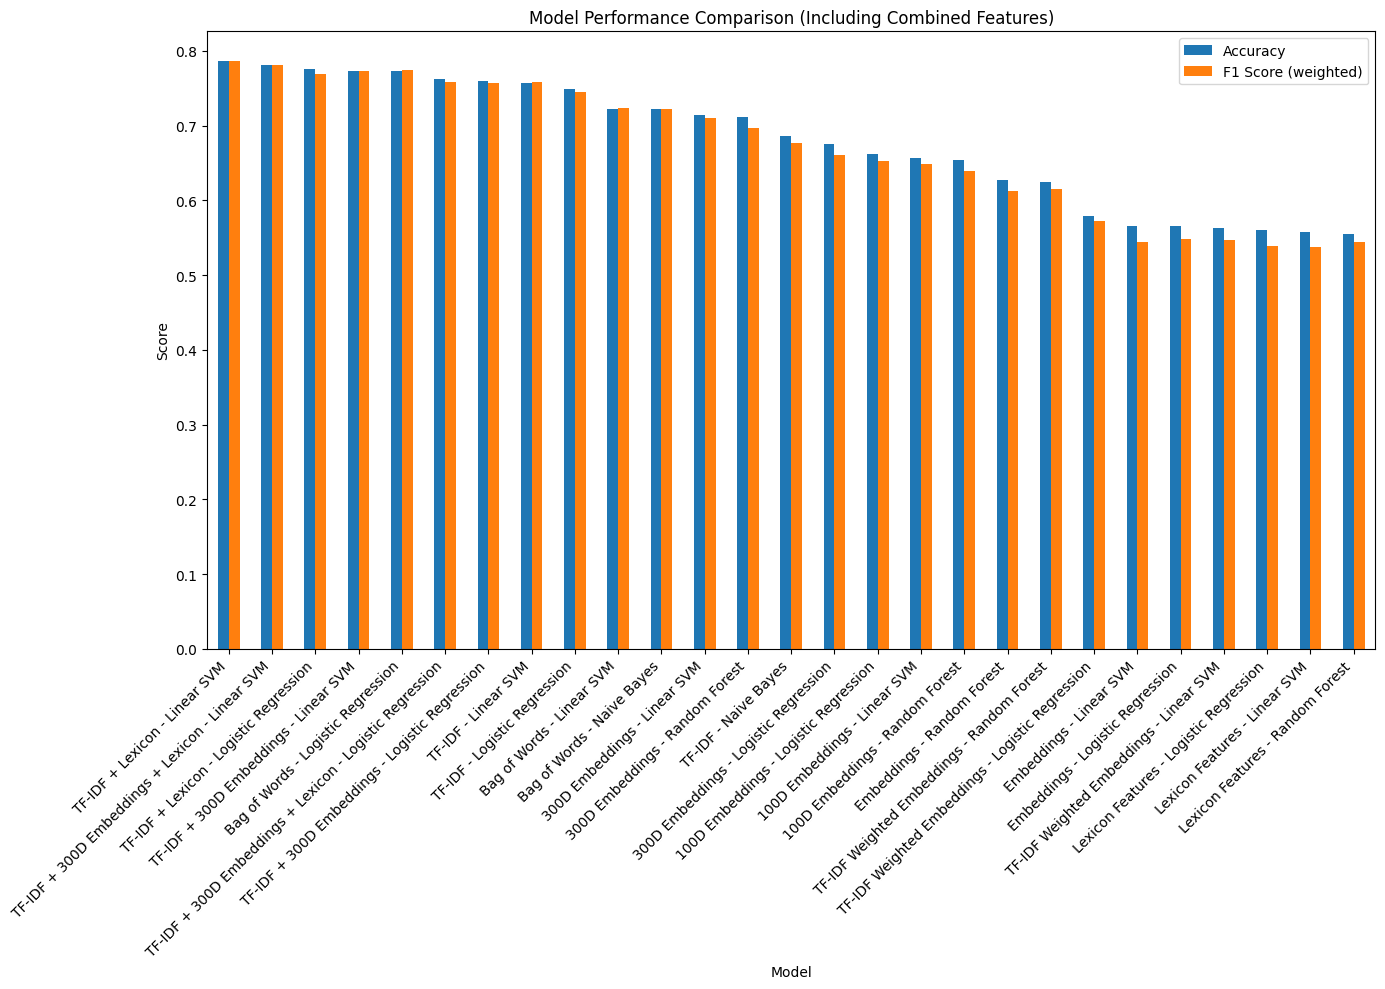


Best performing model: TF-IDF + Lexicon - Linear SVM
Accuracy: 0.7867
F1 Score: 0.7859


In [44]:
# Check shapes to understand our data
print("TF-IDF shape:", X_tfidf.shape)
print("300D Embeddings shape:", embeddings300.shape)
print("Lexicon shape:", lexicon.shape)

# 1. TF-IDF with 300D Embeddings
# Convert embeddings to sparse format for compatibility with TF-IDF
embeddings300_sparse = csr_matrix(embeddings300)
X_tfidf_emb300 = hstack([X_tfidf, embeddings300_sparse])

# Split the combined features
X_tfidf_emb300_train, X_tfidf_emb300_test, y_train_tfidf_emb300, y_test_tfidf_emb300 = train_test_split(
    X_tfidf_emb300, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

# 2. TF-IDF with Lexicon
# Convert lexicon to sparse format
lexicon_sparse = csr_matrix(lexicon)
X_tfidf_lexicon = hstack([X_tfidf, lexicon_sparse])

# Split the combined features
X_tfidf_lexicon_train, X_tfidf_lexicon_test, y_train_tfidf_lexicon, y_test_tfidf_lexicon = train_test_split(
    X_tfidf_lexicon, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

# 3. TF-IDF with 300D Embeddings and Lexicon
X_tfidf_emb300_lexicon = hstack([X_tfidf, embeddings300_sparse, lexicon_sparse])

# Split the combined features
X_tfidf_emb300_lexicon_train, X_tfidf_emb300_lexicon_test, y_train_tfidf_emb300_lexicon, y_test_tfidf_emb300_lexicon = train_test_split(
    X_tfidf_emb300_lexicon, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

# Define models to use (excluding MultinomialNB since we have negative values)
combined_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0),
    'Linear SVM': LinearSVC(C=1.0, max_iter=10000)
}

# Evaluate all three combinations
tfidf_emb300_results = evaluate_models(
    X_tfidf_emb300_train, X_tfidf_emb300_test, 
    y_train_tfidf_emb300, y_test_tfidf_emb300, 
    combined_models, "TF-IDF + 300D Embeddings"
)

tfidf_lexicon_results = evaluate_models(
    X_tfidf_lexicon_train, X_tfidf_lexicon_test, 
    y_train_tfidf_lexicon, y_test_tfidf_lexicon, 
    combined_models, "TF-IDF + Lexicon"
)

tfidf_emb300_lexicon_results = evaluate_models(
    X_tfidf_emb300_lexicon_train, X_tfidf_emb300_lexicon_test, 
    y_train_tfidf_emb300_lexicon, y_test_tfidf_emb300_lexicon, 
    combined_models, "TF-IDF + 300D Embeddings + Lexicon"
)

# Add results to the all_results dictionary
for feature_name, results in zip(
    ["TF-IDF + 300D Embeddings", "TF-IDF + Lexicon", "TF-IDF + 300D Embeddings + Lexicon"],
    [tfidf_emb300_results, tfidf_lexicon_results, tfidf_emb300_lexicon_results]
):
    for model_name, metrics in results.items():
        key = f"{feature_name} - {model_name}"
        all_results[key] = metrics

# Update comparison dataframe
comparison_df = pd.DataFrame({
    'Model': [k for k in all_results.keys()],
    'Accuracy': [v['accuracy'] for v in all_results.values()],
    'F1 Score (weighted)': [v['weighted_f1'] for v in all_results.values()]
})

# Sort by Accuracy
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

# Display and save updated comparison results
print("\n----- Updated Model Comparison -----")
print(comparison_df)
comparison_df.to_csv('sentiment_model_comparison_updated.csv', index=False)

# Plot updated comparison
plt.figure(figsize=(14, 10))
comparison_df.plot(x='Model', y=['Accuracy', 'F1 Score (weighted)'], kind='bar', figsize=(14, 10))
plt.title('Model Performance Comparison (Including Combined Features)')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('sentiment_model_comparison_updated.png')
plt.show()

# Find the best model
best_model_row = comparison_df.iloc[0]
best_model_name = best_model_row['Model']
print(f"\nBest performing model: {best_model_name}")
print(f"Accuracy: {best_model_row['Accuracy']:.4f}")
print(f"F1 Score: {best_model_row['F1 Score (weighted)']:.4f}")

# BOW 


----- Sentiment Classification Results (BoW + 300D Embeddings) -----

Training Logistic Regression...
              precision    recall  f1-score   support

       Mixed       0.75      0.73      0.74       131
    Negative       0.72      0.87      0.79       107
     Neutral       1.00      0.72      0.84        18
    Positive       0.89      0.79      0.84       119

    accuracy                           0.79       375
   macro avg       0.84      0.78      0.80       375
weighted avg       0.80      0.79      0.79       375


----- Sentiment Classification Results (BoW + Lexicon) -----

Training Logistic Regression...
              precision    recall  f1-score   support

       Mixed       0.74      0.70      0.72       131
    Negative       0.72      0.86      0.79       107
     Neutral       1.00      0.72      0.84        18
    Positive       0.86      0.81      0.83       119

    accuracy                           0.78       375
   macro avg       0.83      0.77      0.

<Figure size 1400x1000 with 0 Axes>

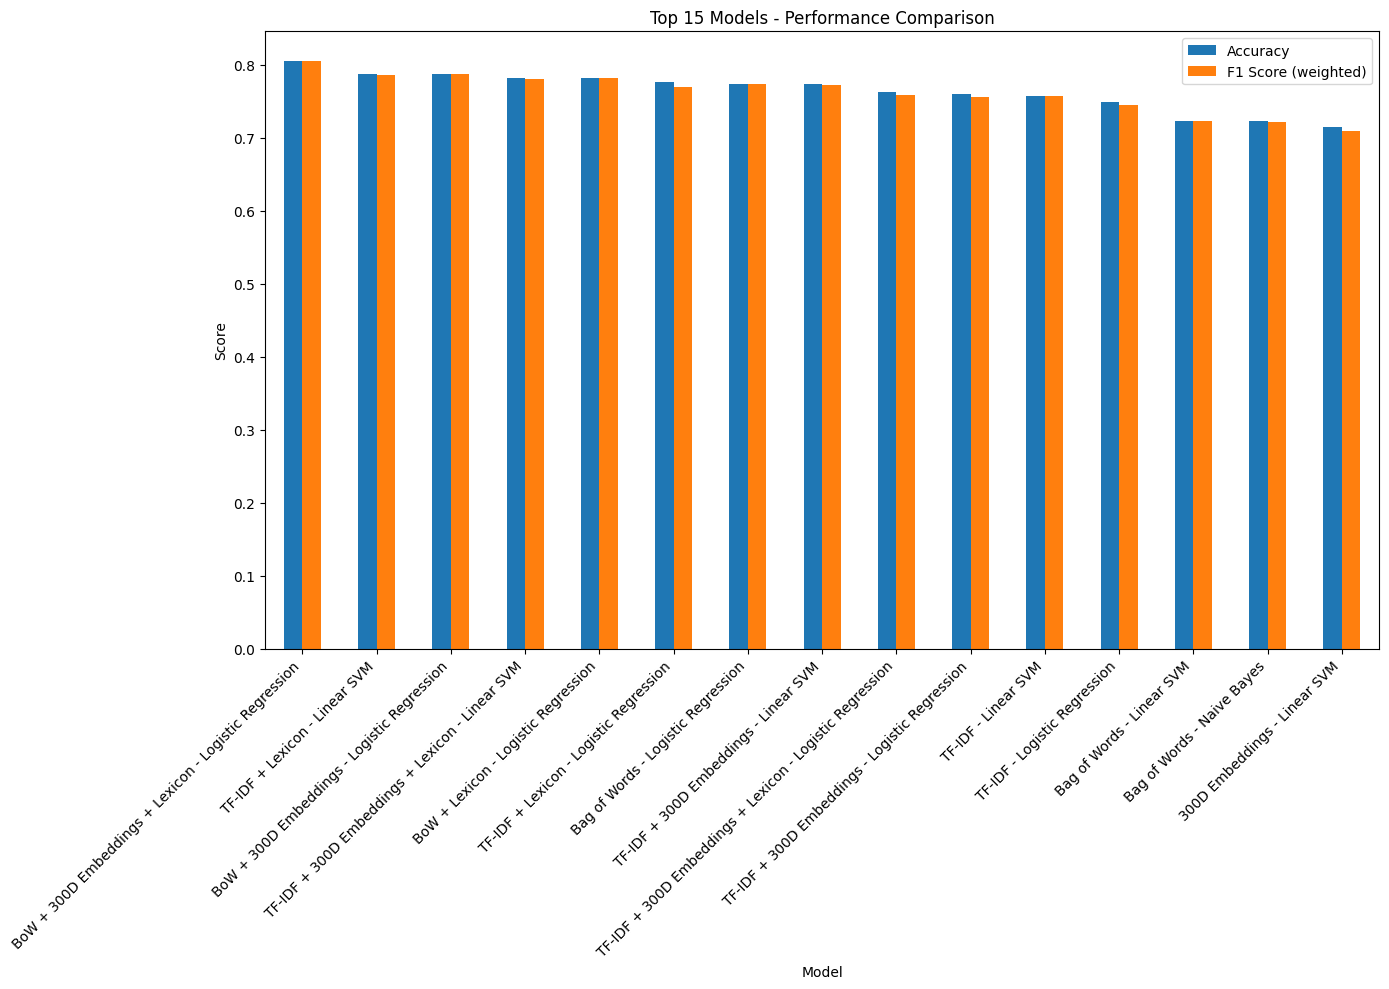


Best performing model: BoW + 300D Embeddings + Lexicon - Logistic Regression
Accuracy: 0.8053
F1 Score: 0.8055


In [45]:
# 1. BoW with Embeddings (300D)
embeddings300_sparse = csr_matrix(embeddings300)
X_bow_emb300 = hstack([X_bow, embeddings300_sparse])

# Split
X_bow_emb300_train, X_bow_emb300_test, y_train_bow_emb300, y_test_bow_emb300 = train_test_split(
    X_bow_emb300, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

# 2. BoW with Lexicon
lexicon_sparse = csr_matrix(lexicon)
X_bow_lexicon = hstack([X_bow, lexicon_sparse])

# Split
X_bow_lexicon_train, X_bow_lexicon_test, y_train_bow_lexicon, y_test_bow_lexicon = train_test_split(
    X_bow_lexicon, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

# 3. BoW with Embeddings and Lexicon (all three)
X_bow_emb300_lexicon = hstack([X_bow, embeddings300_sparse, lexicon_sparse])

# Split
X_bow_emb300_lexicon_train, X_bow_emb300_lexicon_test, y_train_bow_emb300_lexicon, y_test_bow_emb300_lexicon = train_test_split(
    X_bow_emb300_lexicon, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

# Define models (using Logistic Regression as requested)
bow_combined_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0),
}

# Evaluate all combinations
bow_emb300_results = evaluate_models(
    X_bow_emb300_train, X_bow_emb300_test, 
    y_train_bow_emb300, y_test_bow_emb300, 
    bow_combined_models, "BoW + 300D Embeddings"
)

bow_lexicon_results = evaluate_models(
    X_bow_lexicon_train, X_bow_lexicon_test, 
    y_train_bow_lexicon, y_test_bow_lexicon, 
    bow_combined_models, "BoW + Lexicon"
)

bow_emb300_lexicon_results = evaluate_models(
    X_bow_emb300_lexicon_train, X_bow_emb300_lexicon_test, 
    y_train_bow_emb300_lexicon, y_test_bow_emb300_lexicon, 
    bow_combined_models, "BoW + 300D Embeddings + Lexicon"
)

# Add results to the all_results dictionary
for feature_name, results in zip(
    ["BoW + 300D Embeddings", "BoW + Lexicon", "BoW + 300D Embeddings + Lexicon"],
    [bow_emb300_results, bow_lexicon_results, bow_emb300_lexicon_results]
):
    for model_name, metrics in results.items():
        key = f"{feature_name} - {model_name}"
        all_results[key] = metrics

# Update comparison dataframe
comparison_df = pd.DataFrame({
    'Model': [k for k in all_results.keys()],
    'Accuracy': [v['accuracy'] for v in all_results.values()],
    'F1 Score (weighted)': [v['weighted_f1'] for v in all_results.values()]
})

# Sort by Accuracy
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

# Display and save updated comparison results
print("\n----- Updated Model Comparison -----")
print(comparison_df.head(10))  # Show top 10 models
comparison_df.to_csv('sentiment_model_comparison_final.csv', index=False)

# Plot updated comparison (top 15 models)
plt.figure(figsize=(14, 10))
comparison_df.head(15).plot(x='Model', y=['Accuracy', 'F1 Score (weighted)'], kind='bar', figsize=(14, 10))
plt.title('Top 15 Models - Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('sentiment_model_comparison_final.png')
plt.show()

# Find the best model
best_model_row = comparison_df.iloc[0]
best_model_name = best_model_row['Model']
print(f"\nBest performing model: {best_model_name}")
print(f"Accuracy: {best_model_row['Accuracy']:.4f}")
print(f"F1 Score: {best_model_row['F1 Score (weighted)']:.4f}")

# SMOTE NOS BOW E TF IDF COMBINED MELHORES:

Creating combined feature sets...

--- Initial combined datasets ---
TF-IDF Combo Training set class distribution: Counter({'Mixed': 521, 'Positive': 477, 'Negative': 430, 'Neutral': 71})
BoW Combo Training set class distribution: Counter({'Mixed': 521, 'Positive': 477, 'Negative': 430, 'Neutral': 71})
Available classes in the dataset: ['Mixed' 'Negative' 'Neutral' 'Positive']
Class distribution: Counter({'Mixed': 521, 'Positive': 477, 'Negative': 430, 'Neutral': 71})

--- After SMOTE ---
TF-IDF Combo Training set class distribution after SMOTE: Counter({'Mixed': 521, 'Neutral': 521, 'Positive': 477, 'Negative': 430})
BoW Combo Training set class distribution after SMOTE: Counter({'Mixed': 521, 'Neutral': 521, 'Positive': 477, 'Negative': 430})

=== SCENARIO 1: Original training data → Original test data ===

--- Training TF-IDF+Emb300+Lexicon - Linear SVM on Original→Original data ---
Classification Report for TF-IDF+Emb300+Lexicon - Linear SVM on Original→Original data:
             

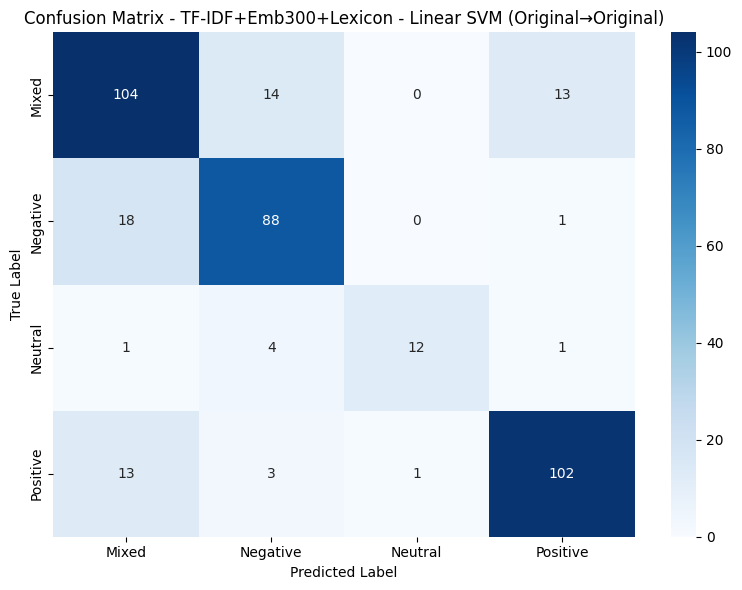


--- Training BoW+Emb300+Lexicon - Logistic Regression on Original→Original data ---
Classification Report for BoW+Emb300+Lexicon - Logistic Regression on Original→Original data:
              precision    recall  f1-score   support

       Mixed       0.76      0.76      0.76       131
    Negative       0.77      0.80      0.79       107
     Neutral       0.86      0.67      0.75        18
    Positive       0.84      0.84      0.84       119

    accuracy                           0.79       375
   macro avg       0.81      0.77      0.78       375
weighted avg       0.79      0.79      0.79       375



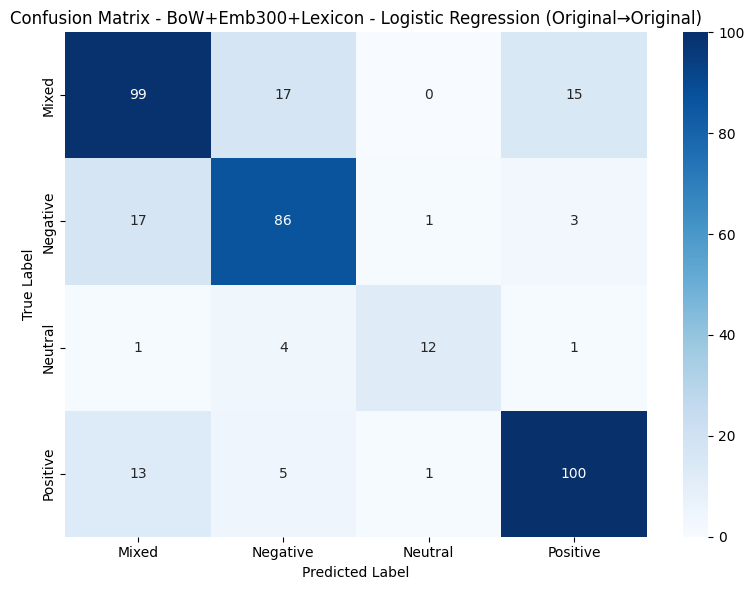


=== SCENARIO 2: SMOTE training data → Original test data ===

--- Training TF-IDF+Emb300+Lexicon - Linear SVM on SMOTE→Original data ---
Classification Report for TF-IDF+Emb300+Lexicon - Linear SVM on SMOTE→Original data:
              precision    recall  f1-score   support

       Mixed       0.76      0.80      0.78       131
    Negative       0.82      0.80      0.81       107
     Neutral       0.80      0.67      0.73        18
    Positive       0.88      0.87      0.87       119

    accuracy                           0.82       375
   macro avg       0.82      0.78      0.80       375
weighted avg       0.82      0.82      0.82       375



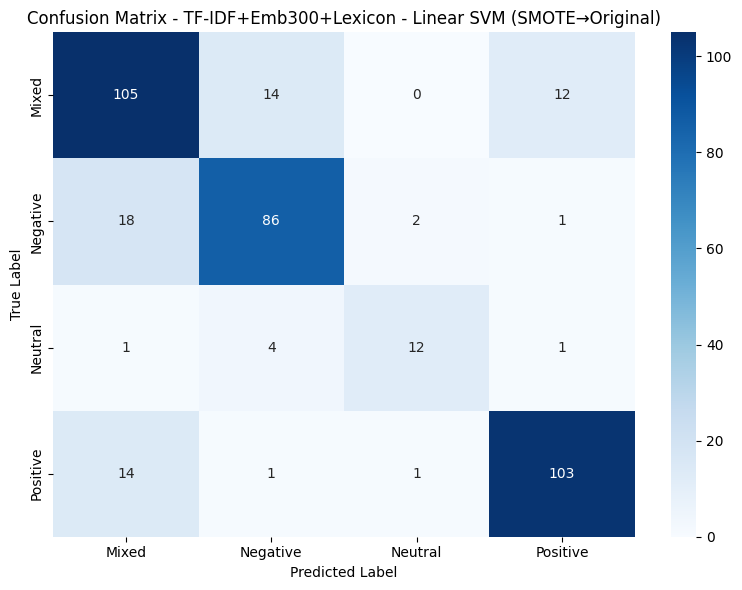


--- Training BoW+Emb300+Lexicon - Logistic Regression on SMOTE→Original data ---
Classification Report for BoW+Emb300+Lexicon - Logistic Regression on SMOTE→Original data:
              precision    recall  f1-score   support

       Mixed       0.76      0.76      0.76       131
    Negative       0.78      0.79      0.79       107
     Neutral       0.76      0.72      0.74        18
    Positive       0.84      0.84      0.84       119

    accuracy                           0.79       375
   macro avg       0.79      0.78      0.78       375
weighted avg       0.79      0.79      0.79       375



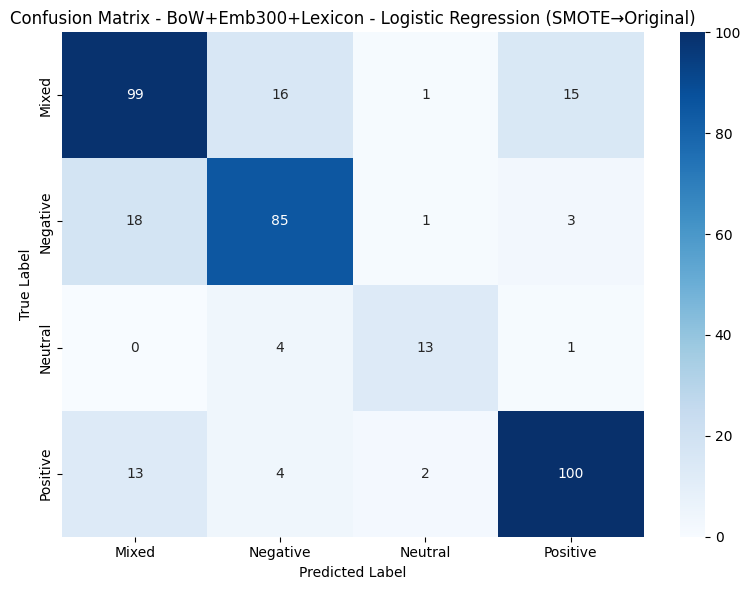


----- Overall Model Comparison -----
                                      model           scenario  accuracy  \
0        TF-IDF+Emb300+Lexicon - Linear SVM  Original→Original     0.816   
2        TF-IDF+Emb300+Lexicon - Linear SVM     SMOTE→Original     0.816   
1  BoW+Emb300+Lexicon - Logistic Regression  Original→Original     0.792   
3  BoW+Emb300+Lexicon - Logistic Regression     SMOTE→Original     0.792   

   weighted_f1  
0     0.816100  
2     0.816114  
1     0.791776  
3     0.791903  


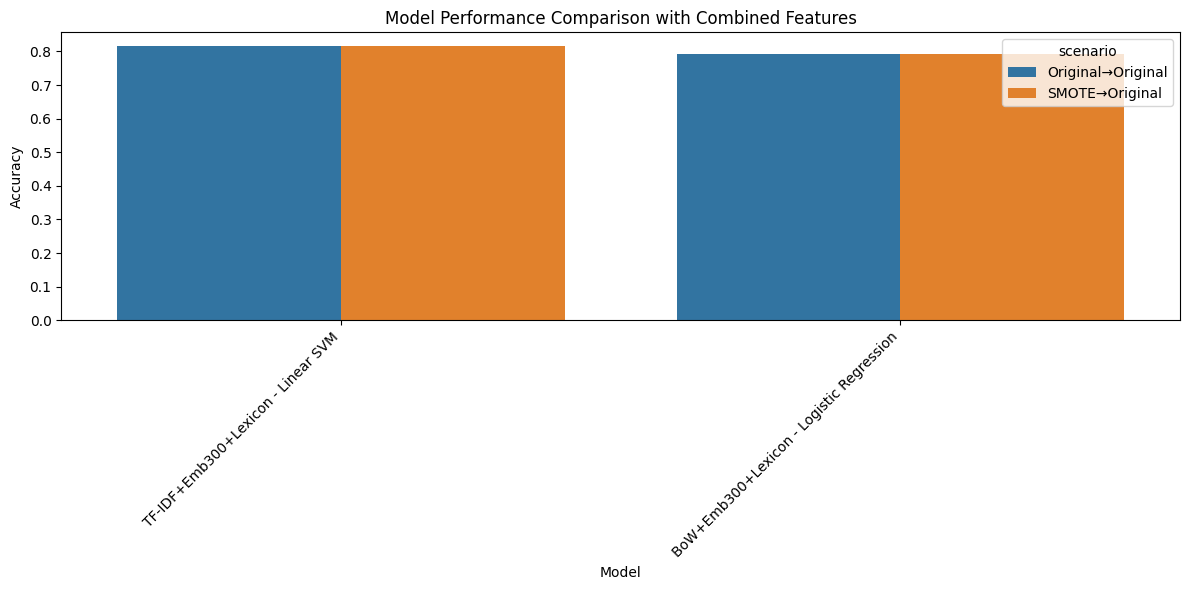


Best performing model: TF-IDF+Emb300+Lexicon - Linear SVM (Original→Original)
Accuracy: 0.8160
F1 Score: 0.8161

--- Per-Class F1 Scores for the Best Model ---
Class Mixed - F1 Score: 0.7790
Class Negative - F1 Score: 0.8148
Class Neutral - F1 Score: 0.7742
Class Positive - F1 Score: 0.8644


In [52]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack, csr_matrix, vstack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

# First, create the combined feature sets
print("Creating combined feature sets...")

# Convert embeddings300 and lexicon to sparse format for compatibility
embeddings300_sparse = csr_matrix(embeddings300)
lexicon_sparse = csr_matrix(lexicon)

# Create TF-IDF + Embeddings300 + Lexicon combination
X_tfidf_emb300_lexicon = hstack([X_tfidf, embeddings300_sparse, lexicon_sparse])

# Create BoW + Embeddings300 + Lexicon combination
X_bow_emb300_lexicon = hstack([X_bow, embeddings300_sparse, lexicon_sparse])

# First, split into train and test sets (80/20)
X_tfidf_combo_train, X_tfidf_combo_test, y_train_tfidf_combo, y_test_tfidf_combo = train_test_split(
    X_tfidf_emb300_lexicon, y_sentiment, test_size=0.2, random_state=42, stratify=y_sentiment
)

X_bow_combo_train, X_bow_combo_test, y_train_bow_combo, y_test_bow_combo = train_test_split(
    X_bow_emb300_lexicon, y_sentiment, test_size=0.2, random_state=42, stratify=y_sentiment
)

print("\n--- Initial combined datasets ---")
print("TF-IDF Combo Training set class distribution:", Counter(y_train_tfidf_combo))
print("BoW Combo Training set class distribution:", Counter(y_train_bow_combo))

# Convert to dense format for SMOTE
X_tfidf_combo_train_dense = X_tfidf_combo_train.toarray()
X_bow_combo_train_dense = X_bow_combo_train.toarray()

## First, check what classes actually exist
unique_classes = np.unique(y_train_tfidf_combo)
print("Available classes in the dataset:", unique_classes)

# Identify the minority class (assuming it's the neutral class)
class_counts = Counter(y_train_tfidf_combo)
print("Class distribution:", class_counts)
minority_class = min(class_counts, key=class_counts.get)
majority_class = max(class_counts, key=class_counts.get)

# Set up SMOTE to oversample the minority class to match the majority class
smote = SMOTE(sampling_strategy={minority_class: class_counts[majority_class]}, 
              random_state=42)

# Apply SMOTE
X_tfidf_combo_train_smote, y_train_tfidf_combo_smote = smote.fit_resample(X_tfidf_combo_train_dense, y_train_tfidf_combo)
X_bow_combo_train_smote, y_train_bow_combo_smote = smote.fit_resample(X_bow_combo_train_dense, y_train_bow_combo)

print("\n--- After SMOTE ---")
print("TF-IDF Combo Training set class distribution after SMOTE:", Counter(y_train_tfidf_combo_smote))
print("BoW Combo Training set class distribution after SMOTE:", Counter(y_train_bow_combo_smote))

# Convert back to sparse matrices for compatibility
X_tfidf_combo_train_smote_sparse = csr_matrix(X_tfidf_combo_train_smote)
X_bow_combo_train_smote_sparse = csr_matrix(X_bow_combo_train_smote)

# Define models
models = {
    'TF-IDF+Emb300+Lexicon - Linear SVM': LinearSVC(C=1.0, max_iter=10000),
    'BoW+Emb300+Lexicon - Logistic Regression': LogisticRegression(max_iter=1000, C=1.0)
}

# Function to evaluate models and display results
def evaluate_model(name, model, X_train, y_train, X_test, y_test, test_type):
    print(f"\n--- Training {name} on {test_type} data ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    weighted_f1 = report['weighted avg']['f1-score']
    
    # Print classification report
    print(f"Classification Report for {name} on {test_type} data:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=sorted(np.unique(y_test)),
               yticklabels=sorted(np.unique(y_test)))
    plt.title(f'Confusion Matrix - {name} ({test_type})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{name.replace(" ", "_").replace("+", "_")}_{test_type}.png')
    plt.show()
    
    return {
        'model': name,
        'scenario': test_type,
        'accuracy': accuracy,
        'weighted_f1': weighted_f1
    }

# Run different training and testing scenarios
results = []

# Scenario 1: Original training data → Original test data
print("\n=== SCENARIO 1: Original training data → Original test data ===")
results.append(evaluate_model('TF-IDF+Emb300+Lexicon - Linear SVM', models['TF-IDF+Emb300+Lexicon - Linear SVM'],
                              X_tfidf_combo_train, y_train_tfidf_combo, X_tfidf_combo_test, y_test_tfidf_combo, "Original→Original"))

results.append(evaluate_model('BoW+Emb300+Lexicon - Logistic Regression', models['BoW+Emb300+Lexicon - Logistic Regression'],
                              X_bow_combo_train, y_train_bow_combo, X_bow_combo_test, y_test_bow_combo, "Original→Original"))

# Scenario 2: SMOTE training data → Original test data
print("\n=== SCENARIO 2: SMOTE training data → Original test data ===")
results.append(evaluate_model('TF-IDF+Emb300+Lexicon - Linear SVM', models['TF-IDF+Emb300+Lexicon - Linear SVM'],
                              X_tfidf_combo_train_smote_sparse, y_train_tfidf_combo_smote, X_tfidf_combo_test, y_test_tfidf_combo, "SMOTE→Original"))

results.append(evaluate_model('BoW+Emb300+Lexicon - Logistic Regression', models['BoW+Emb300+Lexicon - Logistic Regression'],
                              X_bow_combo_train_smote_sparse, y_train_bow_combo_smote, X_bow_combo_test, y_test_bow_combo, "SMOTE→Original"))

# Create comparison DataFrame
comparison_df = pd.DataFrame(results)

# Sort by accuracy
comparison_df = comparison_df.sort_values('accuracy', ascending=False)

# Display and save comparison results
print("\n----- Overall Model Comparison -----")
print(comparison_df)
comparison_df.to_csv('sentiment_model_comparison_combined_features_smote.csv', index=False)

# Plot comparison of all scenarios
plt.figure(figsize=(12, 6))
sns.barplot(x='model', y='accuracy', hue='scenario', data=comparison_df)
plt.title('Model Performance Comparison with Combined Features')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('model_comparison_combined_features_smote.png')
plt.show()

# Find the best model
best_model_row = comparison_df.iloc[0]
print(f"\nBest performing model: {best_model_row['model']} ({best_model_row['scenario']})")
print(f"Accuracy: {best_model_row['accuracy']:.4f}")
print(f"F1 Score: {best_model_row['weighted_f1']:.4f}")

# Additional: Per-class F1 scores (useful to see neutral class improvement)
print("\n--- Per-Class F1 Scores for the Best Model ---")
best_model_name = best_model_row['model']
best_scenario = best_model_row['scenario']

if best_model_name == 'TF-IDF+Emb300+Lexicon - Linear SVM':
    if best_scenario == "Original→Original":
        X_train, y_train = X_tfidf_combo_train, y_train_tfidf_combo
    else:  # SMOTE→Original
        X_train, y_train = X_tfidf_combo_train_smote_sparse, y_train_tfidf_combo_smote
    X_test, y_test = X_tfidf_combo_test, y_test_tfidf_combo
    model = models['TF-IDF+Emb300+Lexicon - Linear SVM']
else:  # BoW+Emb300+Lexicon - Logistic Regression
    if best_scenario == "Original→Original":
        X_train, y_train = X_bow_combo_train, y_train_bow_combo
    else:  # SMOTE→Original
        X_train, y_train = X_bow_combo_train_smote_sparse, y_train_bow_combo_smote
    X_test, y_test = X_bow_combo_test, y_test_bow_combo
    model = models['BoW+Emb300+Lexicon - Logistic Regression']

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Print per-class metrics
for class_label in sorted(np.unique(y_test)):
    print(f"Class {class_label} - F1 Score: {report[str(class_label)]['f1-score']:.4f}")

# Grid search and cross val


Class distribution: Counter({'Mixed': 652, 'Positive': 596, 'Negative': 537, 'Neutral': 89})

=== Tuning TF-IDF + Emb300 + Lexicon with LinearSVC ===
Fitting 5 folds for each of 56 candidates, totalling 280 fits


/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/svm/_classes.py", line 321, in fit
    self.coef_, self.intercept_, n


Best SVM Parameters: {'C': 1.0, 'dual': True, 'loss': 'hinge', 'tol': 0.0001}
Best SVM F1 Score: 0.7901
Training Time: 36.53 seconds

=== Tuning BoW + Emb300 + Lexicon with Logistic Regression ===
Fitting 5 folds for each of 126 candidates, totalling 630 fits


/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warni


Best Logistic Regression Parameters: {'C': 0.5, 'l1_ratio': 0.2, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}
Best Logistic Regression F1 Score: 0.7780
Training Time: 3098.40 seconds

----- Overall Model Comparison -----
                                      model  f1_score  training_time
0         TF-IDF+Emb300+Lexicon - LinearSVC  0.790091      36.528644
1  BoW+Emb300+Lexicon - Logistic Regression  0.778001    3098.402618


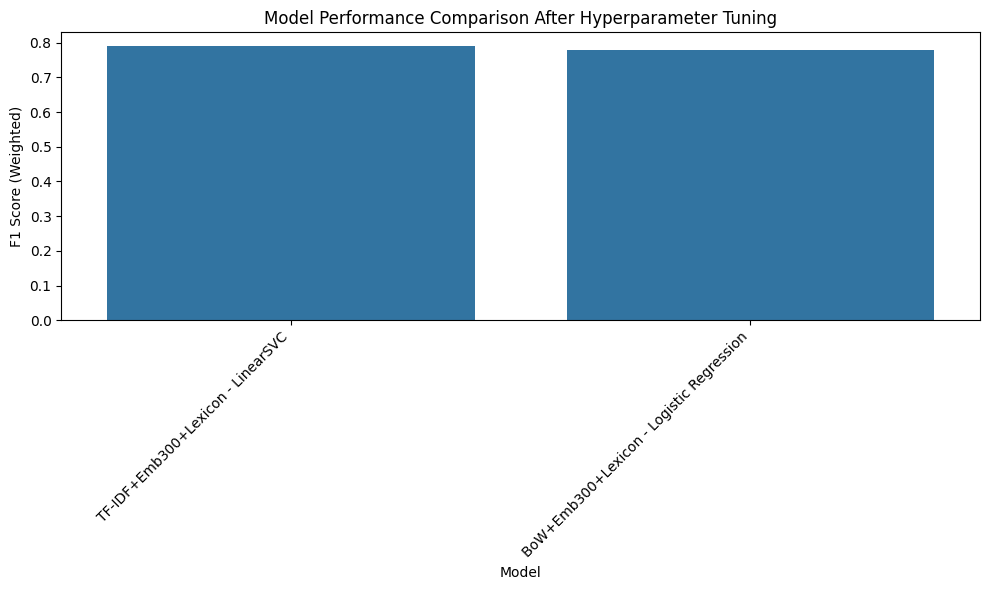

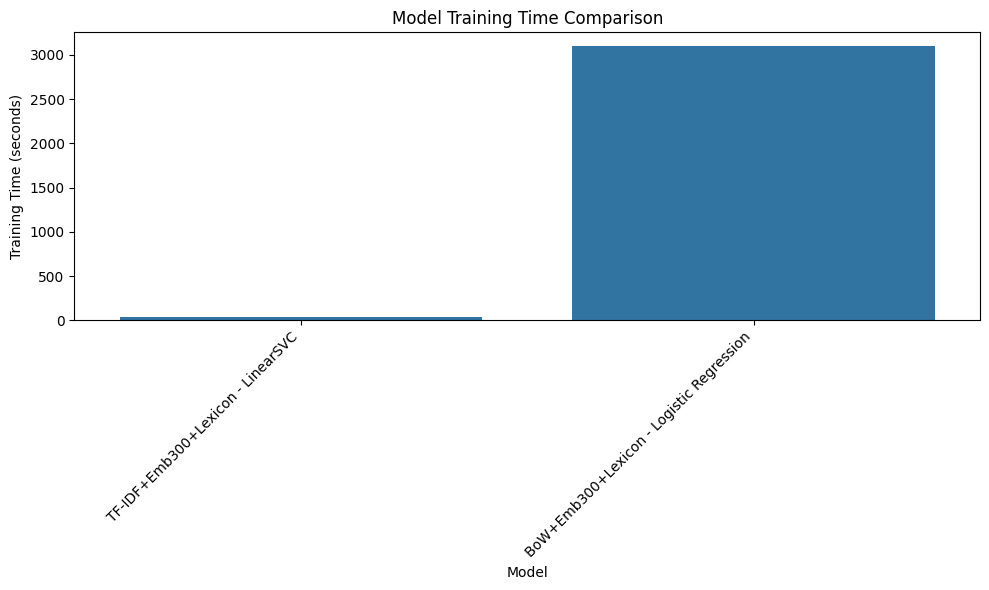

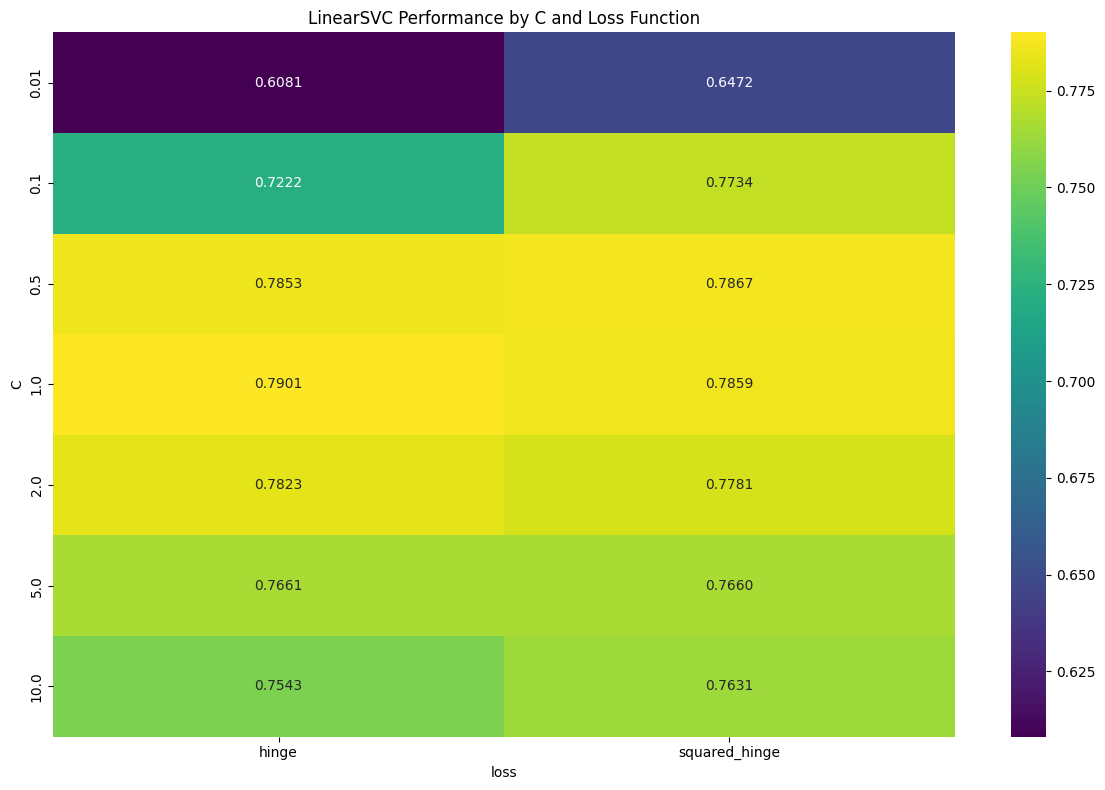

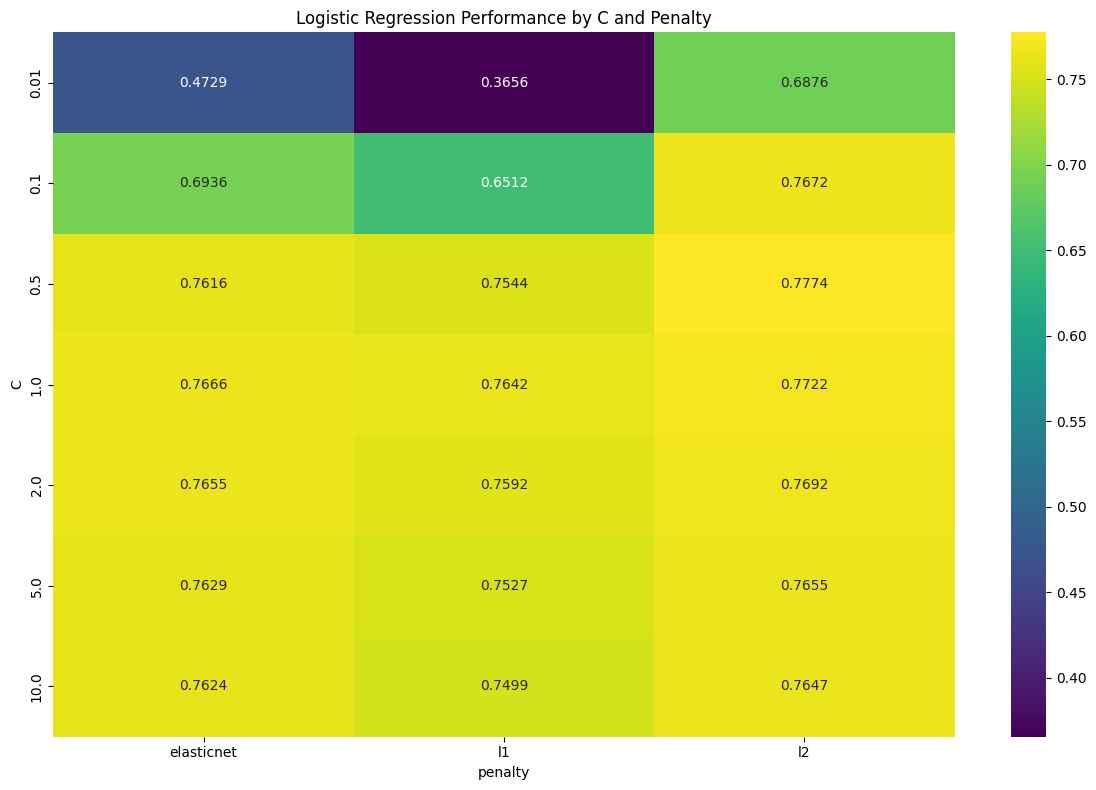


=== Final Evaluation with Best Parameters ===


/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warni


Best TF-IDF+Emb300+Lexicon - LinearSVC:
Parameters: {'C': 1.0, 'dual': True, 'loss': 'hinge', 'tol': 0.0001}
Mean Accuracy: 0.7919 ± 0.0238
Mean F1 Score: 0.7901 ± 0.0247

Best BoW+Emb300+Lexicon - Logistic Regression:
Parameters: {'C': 0.5, 'l1_ratio': 0.2, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}
Mean Accuracy: 0.7807 ± 0.0215
Mean F1 Score: 0.7780 ± 0.0237


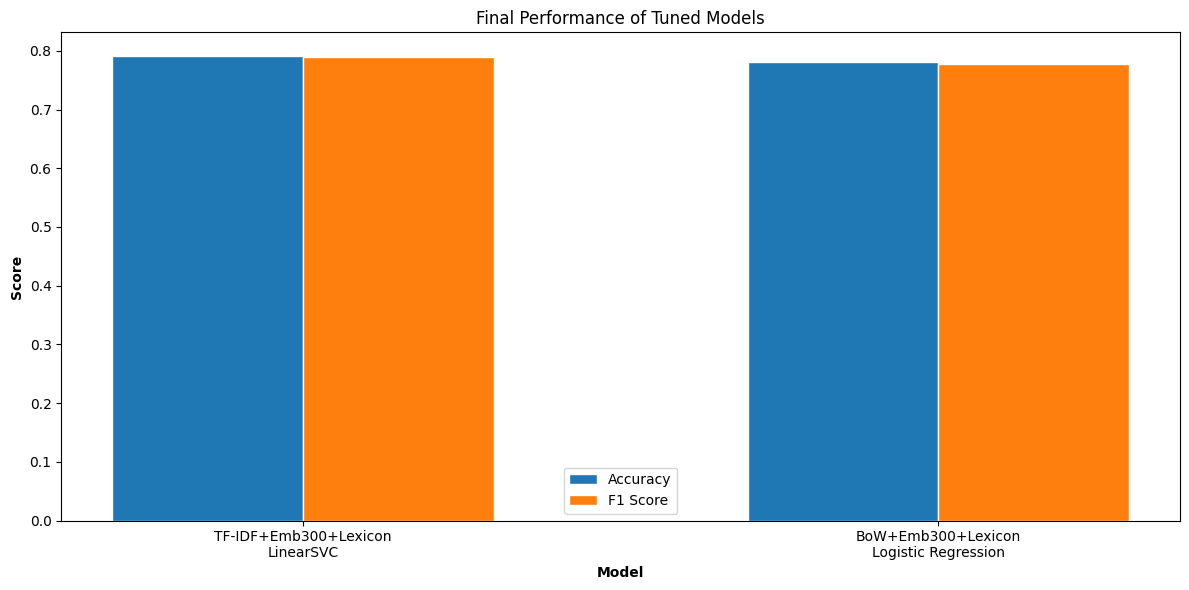

In [53]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack, csr_matrix, vstack
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import time

# Define the class labels and check distribution
print("Class distribution:", Counter(y_sentiment))

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_weighted': make_scorer(f1_score, average='weighted')
}

# Define parameter grids for each model
svm_param_grid = {
    'C': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'loss': ['hinge', 'squared_hinge'],
    'dual': [True, False],
    'tol': [1e-4, 1e-3]
}

lr_param_grid = {
    'C': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],  # saga supports all penalties
    'l1_ratio': [0.2, 0.5, 0.8],  # Only used with elasticnet
    'tol': [1e-4, 1e-3]
}

# Store results for visualization
all_results = []

# ----- Model 1: TF-IDF + Emb300 + Lexicon with LinearSVC -----
print("\n=== Tuning TF-IDF + Emb300 + Lexicon with LinearSVC ===")

# Convert embeddings300 and lexicon to sparse format if needed
embeddings300_sparse = csr_matrix(embeddings300) if not isinstance(embeddings300, csr_matrix) else embeddings300
lexicon_sparse = csr_matrix(lexicon) if not isinstance(lexicon, csr_matrix) else lexicon

# Create the combined feature set
X_tfidf_emb300_lexicon = hstack([X_tfidf, embeddings300_sparse, lexicon_sparse])

# Initialize model
svm_model = LinearSVC(max_iter=10000, random_state=42)

# Start timing
start_time = time.time()

# Set up GridSearchCV
svm_grid = GridSearchCV(
    estimator=svm_model,
    param_grid=svm_param_grid,
    scoring='f1_weighted',  # Primary metric for optimization
    cv=cv,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit on the combined feature set
svm_grid.fit(X_tfidf_emb300_lexicon, y_sentiment)

# Calculate training time
svm_train_time = time.time() - start_time

# Get best parameters and results
best_svm_params = svm_grid.best_params_
best_svm_score = svm_grid.best_score_

print(f"\nBest SVM Parameters: {best_svm_params}")
print(f"Best SVM F1 Score: {best_svm_score:.4f}")
print(f"Training Time: {svm_train_time:.2f} seconds")

# Get CV results for visualization
svm_cv_results = pd.DataFrame(svm_grid.cv_results_)

# Store for comparison
all_results.append({
    'model': 'TF-IDF+Emb300+Lexicon - LinearSVC',
    'best_params': best_svm_params,
    'f1_score': best_svm_score,
    'training_time': svm_train_time
})

# ----- Model 2: BoW + Emb300 + Lexicon with Logistic Regression -----
print("\n=== Tuning BoW + Emb300 + Lexicon with Logistic Regression ===")

# Create the combined feature set
X_bow_emb300_lexicon = hstack([X_bow, embeddings300_sparse, lexicon_sparse])

# Initialize model
lr_model = LogisticRegression(max_iter=5000, random_state=42)

# Start timing
start_time = time.time()

# Set up GridSearchCV
lr_grid = GridSearchCV(
    estimator=lr_model,
    param_grid=lr_param_grid,
    scoring='f1_weighted',  # Primary metric for optimization
    cv=cv,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit on the combined feature set
lr_grid.fit(X_bow_emb300_lexicon, y_sentiment)

# Calculate training time
lr_train_time = time.time() - start_time

# Get best parameters and results
best_lr_params = lr_grid.best_params_
best_lr_score = lr_grid.best_score_

print(f"\nBest Logistic Regression Parameters: {best_lr_params}")
print(f"Best Logistic Regression F1 Score: {best_lr_score:.4f}")
print(f"Training Time: {lr_train_time:.2f} seconds")

# Get CV results for visualization
lr_cv_results = pd.DataFrame(lr_grid.cv_results_)

# Store for comparison
all_results.append({
    'model': 'BoW+Emb300+Lexicon - Logistic Regression',
    'best_params': best_lr_params,
    'f1_score': best_lr_score,
    'training_time': lr_train_time
})

# Create comprehensive results DataFrame
results_df = pd.DataFrame(all_results)
print("\n----- Overall Model Comparison -----")
print(results_df[['model', 'f1_score', 'training_time']])

# Save results to CSV
results_df.to_csv('hyperparameter_tuning_results.csv', index=False)

# Create visualizations
# 1. Model F1 Scores Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='f1_score', data=results_df)
plt.title('Model Performance Comparison After Hyperparameter Tuning')
plt.ylabel('F1 Score (Weighted)')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('tuned_model_comparison_f1.png')
plt.show()

# 2. Training Time Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='training_time', data=results_df)
plt.title('Model Training Time Comparison')
plt.ylabel('Training Time (seconds)')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('tuned_model_comparison_time.png')
plt.show()

# 3. Visualize parameter importance for SVM
plt.figure(figsize=(12, 8))
# Get parameter combinations and mean test scores
param_scores = pd.DataFrame({
    'C': svm_cv_results['param_C'],
    'loss': svm_cv_results['param_loss'],
    'mean_test_score': svm_cv_results['mean_test_score']
})

# Create a pivot table for visualization
pivot_data = param_scores.pivot_table(
    index='C', 
    columns='loss', 
    values='mean_test_score',
    aggfunc='mean'
)

# Create heatmap
sns.heatmap(pivot_data, annot=True, cmap='viridis', fmt='.4f')
plt.title('LinearSVC Performance by C and Loss Function')
plt.tight_layout()
plt.savefig('svm_parameter_heatmap.png')
plt.show()

# 4. Visualize parameter importance for Logistic Regression
plt.figure(figsize=(12, 8))
# Get parameter combinations and mean test scores
param_scores = pd.DataFrame({
    'C': lr_cv_results['param_C'],
    'penalty': lr_cv_results['param_penalty'],
    'mean_test_score': lr_cv_results['mean_test_score']
})

# Create a pivot table for visualization
pivot_data = param_scores.pivot_table(
    index='C', 
    columns='penalty', 
    values='mean_test_score',
    aggfunc='mean'
)

# Create heatmap
sns.heatmap(pivot_data, annot=True, cmap='viridis', fmt='.4f')
plt.title('Logistic Regression Performance by C and Penalty')
plt.tight_layout()
plt.savefig('lr_parameter_heatmap.png')
plt.show()

# Final evaluation with best parameters
print("\n=== Final Evaluation with Best Parameters ===")

# Create the final best models
best_svm = LinearSVC(**best_svm_params, max_iter=10000, random_state=42)
best_lr = LogisticRegression(**best_lr_params, max_iter=5000, random_state=42)

# Perform cross-validation with the best parameters
svm_acc_scores = cross_val_score(best_svm, X_tfidf_emb300_lexicon, y_sentiment, cv=cv, scoring='accuracy')
svm_f1_scores = cross_val_score(best_svm, X_tfidf_emb300_lexicon, y_sentiment, cv=cv, scoring='f1_weighted')

lr_acc_scores = cross_val_score(best_lr, X_bow_emb300_lexicon, y_sentiment, cv=cv, scoring='accuracy')
lr_f1_scores = cross_val_score(best_lr, X_bow_emb300_lexicon, y_sentiment, cv=cv, scoring='f1_weighted')

# Print final results
print(f"\nBest TF-IDF+Emb300+Lexicon - LinearSVC:")
print(f"Parameters: {best_svm_params}")
print(f"Mean Accuracy: {np.mean(svm_acc_scores):.4f} ± {np.std(svm_acc_scores):.4f}")
print(f"Mean F1 Score: {np.mean(svm_f1_scores):.4f} ± {np.std(svm_f1_scores):.4f}")

print(f"\nBest BoW+Emb300+Lexicon - Logistic Regression:")
print(f"Parameters: {best_lr_params}")
print(f"Mean Accuracy: {np.mean(lr_acc_scores):.4f} ± {np.std(lr_acc_scores):.4f}")
print(f"Mean F1 Score: {np.mean(lr_f1_scores):.4f} ± {np.std(lr_f1_scores):.4f}")

# Create a final comparison DataFrame
final_results = pd.DataFrame([
    {
        'model': 'TF-IDF+Emb300+Lexicon - LinearSVC',
        'parameters': str(best_svm_params),
        'accuracy': np.mean(svm_acc_scores),
        'accuracy_std': np.std(svm_acc_scores),
        'f1_score': np.mean(svm_f1_scores),
        'f1_score_std': np.std(svm_f1_scores)
    },
    {
        'model': 'BoW+Emb300+Lexicon - Logistic Regression',
        'parameters': str(best_lr_params),
        'accuracy': np.mean(lr_acc_scores),
        'accuracy_std': np.std(lr_acc_scores),
        'f1_score': np.mean(lr_f1_scores),
        'f1_score_std': np.std(lr_f1_scores)
    }
])

# Save final results
final_results.to_csv('final_tuned_model_comparison.csv', index=False)

# Final visualization
plt.figure(figsize=(12, 6))
barWidth = 0.3
r1 = np.arange(2)
r2 = [x + barWidth for x in r1]

# Create bars
plt.bar(r1, final_results['accuracy'], width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, final_results['f1_score'], width=barWidth, edgecolor='white', label='F1 Score')

# Add labels and legend
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(2)], ['TF-IDF+Emb300+Lexicon\nLinearSVC', 'BoW+Emb300+Lexicon\nLogistic Regression'])
plt.title('Final Performance of Tuned Models')
plt.legend()
plt.tight_layout()
plt.savefig('final_tuned_model_performance.png')
plt.show()

In [60]:
import joblib

# Save the best models
joblib.dump(models['TF-IDF+Emb300+Lexicon - Linear SVM'], 'tfidf_emb300_lexicon_svm.joblib')
joblib.dump(models['BoW+Emb300+Lexicon - Logistic Regression'], 'bow_emb300_lexicon_logreg.joblib')

print("✅ Models saved successfully!")


✅ Models saved successfully!


# Nothing changed that much, which makes us conclude that the model can't adapt much more to the data.